
<h1><center>Perceptron simple</center></h1>


# <h1 id="iris">Dataset IRIS</h1>

El Famoso set de datos que contiene información de 3 diferentes especies (target):

* Iris-Setosa (0)
* Iris-Versicolor (1)
* Iris-Virginica (2)

El dataset contiene 150 muestras (50 por cada especie) y 4 características:

* Longitud del sepalo (cm)
* Ancho del sepalo (cm)
* Longitud del petalo (cm)
* Ancho del petalo (cm)


In [15]:
import numpy as np                         
import matplotlib.pyplot as plt                
%matplotlib inline
from sklearn.datasets import load_iris         # para traer Datasets, en especial el dataset iris 
from sklearn.linear_model import Perceptron    # Trae arquitectura de perceptron a partir de sklearn.linear_model

iris = load_iris()                             # variable en la cual se carga el dataset

In [16]:
iris.target                                    # Clasificación-etiquetas 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

El conjunto de datos esta en formato array, vease los primeros 5 observaciones.

In [17]:
iris.data[:5, :] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

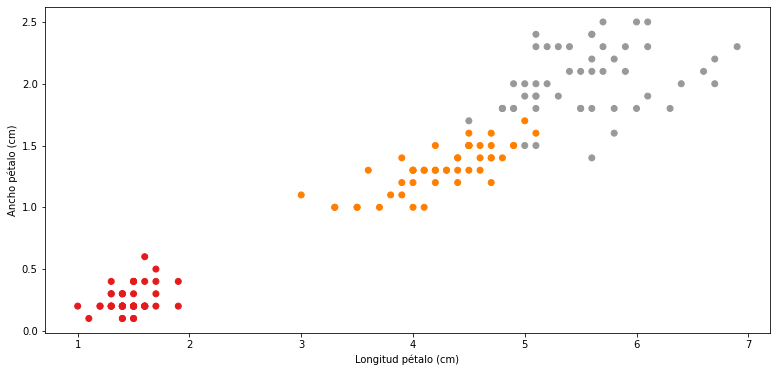

In [18]:
data = iris.data[:, (2, 3)]       # Trayendo longitud y ancho del pétalo
labels = iris.target

plt.figure(figsize=(13,6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor='face')
plt.xlabel('Longitud pétalo (cm)')
plt.ylabel('Ancho pétalo (cm)')
plt.show()

En la gráfica se logra observar tres grupos caracterizados por diferente color, con lo cual se logra afirmar que los tipos de flores del dataset se caracterizan especialmente por su longitud y ancho de pétalo.

En consecuencia, se quiere entrenar una red neuronal de tal manera que permita clasificar cualquier flor dentro de las categorias establecidas (etiquetas).

In [19]:
X = iris.data[:, (2, 3)]                  # Longitud y ancho del petalo 

## Es Iris Virginica?
y = (iris.target == 2).astype(np.int)     # .astype(np.int)  Asegura que la red obtenga solamente valores enteros

test_perceptron = Perceptron()            # Llamando el constructor del perceptron.
test_perceptron.fit(X, y)                 # Entrenando     

Perceptron()

Evaluando el desempeño.

In [22]:
y1_pred = test_perceptron.predict([[5.1, 2]])           #poniendo a prueba una flor con (5.1, 2) (longotud y ancho) respectivamente
y2_pred = test_perceptron.predict([[1.4, 0.2]])
print('Predicción 1:', y1_pred)

Predicción 1: [1]


In [ ]:
La especie corresponderia a la especie 1

In [23]:
print('Predicción 2:', y2_pred)

Predicción 2: [0]


La especie corresponderia a la especie 0. No obstante, Si se quiere implementar clasificadores más complejos como la identificación de patrones se recurre a combinar múltiples perceptrones.

# <h1 id="mlp">Multi-layer Perceptron (MLP)</h1>


![texto alternativo](https://drive.google.com/uc?id=12-AUUKOswfzkZW6xRziIZhxldCa9vDSU)

Una arquitectura de múltiples capas de perceptrones o MLP) es la respuesta a la necesidad de poder analizar problemas más complejos como lo es la clasificación de imágenes. A grandes rasgos y tal y como se muestra en la animación está compuesta por una capa de entrada, una o múltiples capas de TLUs denominadas capas ocultas cada una compuesta por diferentes perceptrones y una capa final denominada capa de salida. Cuando se incluyen más de dos capas ocultas se suele denominar red neuronal profunda (Deep Neural Network DNN)



![texto alternativo](https://drive.google.com/uc?id=1n0EQyBxXsxCBFQWTZJl-BbJIN2_Ht6sv)

# <h1 id="backward">Backward Propagation</h1>

La propagación hacia atrás o backpropagation es un algoritmo de entrenamiento de redes neuronales. El método consiste en un ciclo de propagación y adaptación en dos fases. Primero se aplica un estímulo a la entrada de la red que se propaga por todas las capas hasta generar una salida. Luego la señal de salida se compara con la salida deseada y se calcula el error para cada una de las salidas. Enseguida, el error calculado se propaga hacia atrás partiendo desde la capa de salida hasta la capa de entrada de tal manera que todas las neuronas reciben una retroalimentación respecto a su contribución relativa al error. 

![texto alternativo](https://drive.google.com/uc?id=1YC5Lcj-Axj0XewPZ7glzbIIOZbdCY219)

## Algoritmo Backward propagation

* Se procesa un mini-lote de información a la vez. Cada paso de la información por la red se denomina época. 
*  Cada mini-batch de información es pasado por la capa de entrada la cual lo envía a la primera capa oculta. 
*  Luego se procesa la salida de todas las neuronas en esta capa (por cada muestra en el batch) 
*  El resultado se pasa a la siguiente capa y así sucesivamente hasta la capa de salida. Hasta ahora el proceso es el mismo que forward pass, todos los resultados intermedios son almacenados hasta que son necesitados por el paso de backward.
*  Enseguida el algoritmo mide el error en la salida mediante funciones de pérdidas y retorna la medida del error.
*  Luego se calcula la contribución en el error de conexión correspondiente con la capa anterior aplicando la regla de la cadena, fundamental en el cálculo. Este proceso se reitera hasta la capa de entrada.
*  En efecto el algoritmo propaga el gradiente del error a todos los pesos correspondientes de las conexiones en la red.
*  Finalmente se ejecuta un gradiente descendente para ajustar todos los pesos sinápticos en la red empleando los gradientes de error.


**Happy Coding!**